In [2]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set()
flights = sns.load_dataset

In [3]:
inputFilename = '../data/mean_expression_matrix.txt'
inputFile = open(inputFilename)

tissues = np.loadtxt('../data/tissues.txt', dtype='str', delimiter='\t')
num_tissues = len(tissues)
matrix = np.loadtxt(inputFile, skiprows=1, usecols=range(1,num_tissues))

rank = np.linalg.matrix_rank(matrix)
print('Mean expression matrix has rank: ', rank)
indexOfMax = np.argmax(matrix)
unraveledIndex = np.unravel_index(indexOfMax, matrix.shape)
print(unraveledIndex)
#matrix[unraveledIndex[0]][unraveledIndex[1]] = 1000
print(indexOfMax)

Mean expression matrix has rank:  52
(160, 37)
8357


0 546 0 52


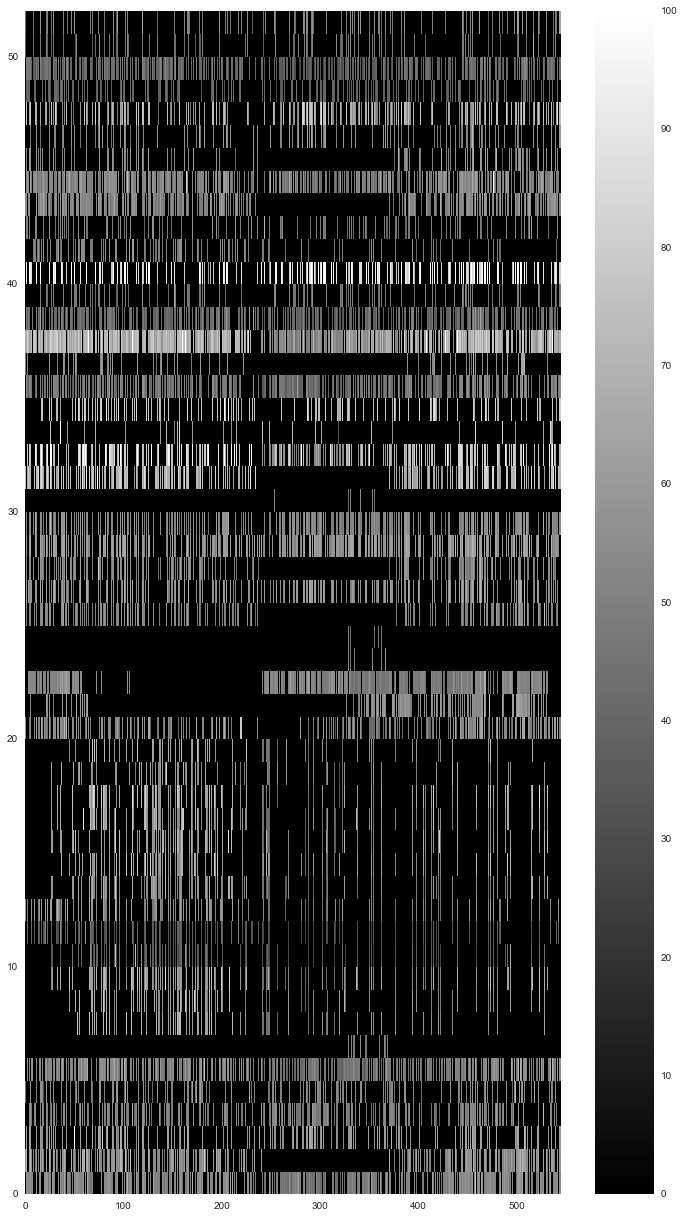

["b'Esophagus - Gastroesophageal Junction'" "b'Esophagus - Mucosa'"
 "b'Esophagus - Muscularis'" "b'Artery - Aorta'" "b'Fallopian Tube'"]


In [4]:
fig, ax = plt.subplots()
# Use gray scale with threshold near 0 to visualize number of 0 elements
matrix = np.transpose(matrix)
heatmap = plt.pcolor(matrix, cmap='gray', vmin=0, vmax=100)
x_min = 0
x_max = matrix.shape[1] + 1
y_min = 0
y_max = matrix.shape[0]
plt.axis([x_min, x_max, y_min, y_max])
print(x_min, x_max+1, y_min, y_max)

fig.set_size_inches(12, len(tissues)*0.4, forward=True)
ind = 1 + np.arange(len(tissues))  # the x locations for the groups
#ax.set_yticks(ind)
#ax.set_yticklabels(tuple(tissues),fontsize = 12)

'''
# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[1])+0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
'''
plt.colorbar()
plt.show()
print(tissues[20:25])

(array([20129,  2667,  4836,   603,    42]), array([  0,  25,  50,  75, 100, 200]))


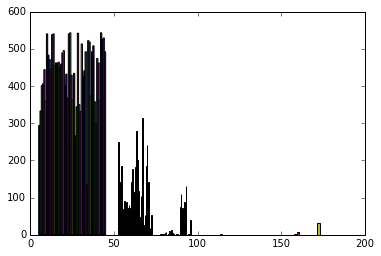

In [7]:
# Histogram of mean expression levels
hist = np.histogram(matrix, bins = [0, 25, 50, 75, 100, 200])
print(hist)
plt.hist(matrix, bins = [0, 50, 75, 100, 200])
plt.show()

1
2


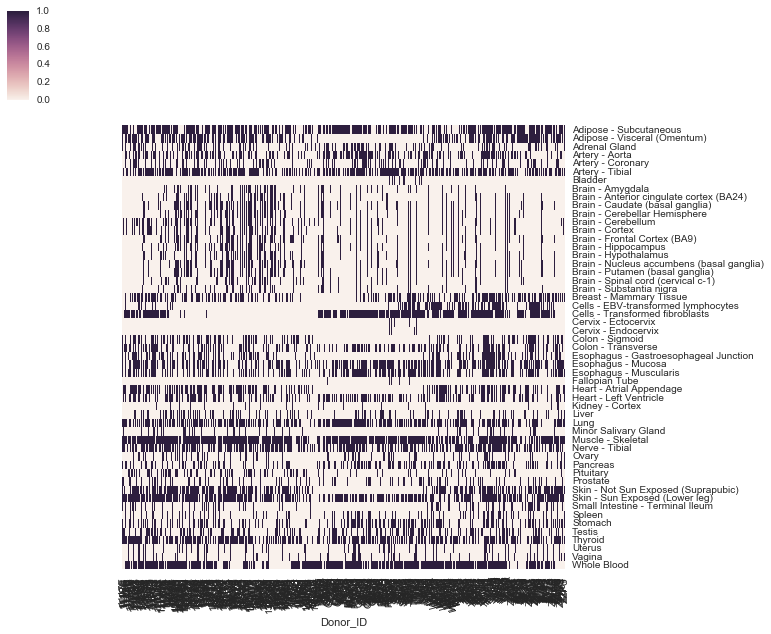

In [38]:
E = pd.read_csv('../data/mean_expression_matrix.txt', sep='\t', index_col=0)
E = E.transpose()
def logPlus1(x):
    return np.log(x+1)

def threshold(x, thresh):
    return 1 if x > thresh else 0

E_new = E.applymap(lambda x: threshold(x, 1))
#E.applymap(logPlus1)
"""
for idx, vals in E.iterrows():
    print(vals[0])
    print(idx)
    #print(E[idx])
    print(E[idx,0])
    for col, val in enumerate(vals):
        E[idx,col] = np.log(val[0]+1)
        """
print('1')
g = sns.clustermap(E_new, row_cluster=False, col_cluster=False)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
print('2')